In [67]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
%matplotlib inline

time: 464 ms


In [13]:
df = pd.read_csv('bosbiz.csv')
df.head()

,name,sic,lon,lat,gh7
0,BANYAN,NaN,-71.071670,42.344100,drt2ysx
1,CAFFE NERO,NaN,-71.114746,42.311003,drt2twr
2,MARIO''S SUB & SALADS,NaN,-71.071059,42.345064,drt2ysx
3,UNO PIZZERIA & GRILL,NaN,-71.097064,42.348594,drt2yjk
4,PANERA BREAD/SAINT LOUIS BREAD CO.,NaN,-71.102373,42.343769,drt2yh2


time: 23.4 ms


In [14]:
#finding bounding values of the dataset
lonMax = df.lon.max()
lonMin = df.lon.min()
latMax = df.lat.max()
latMin = df.lat.min()


time: 3.69 ms


In [15]:
latMax

42.349542999999997

time: 3.41 ms


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-71.19,42.22,-70.933228,42.445454&bboxSR=4326&imageSR=4326&size=1500,1317&dpi=96&format=png32&f=image


/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


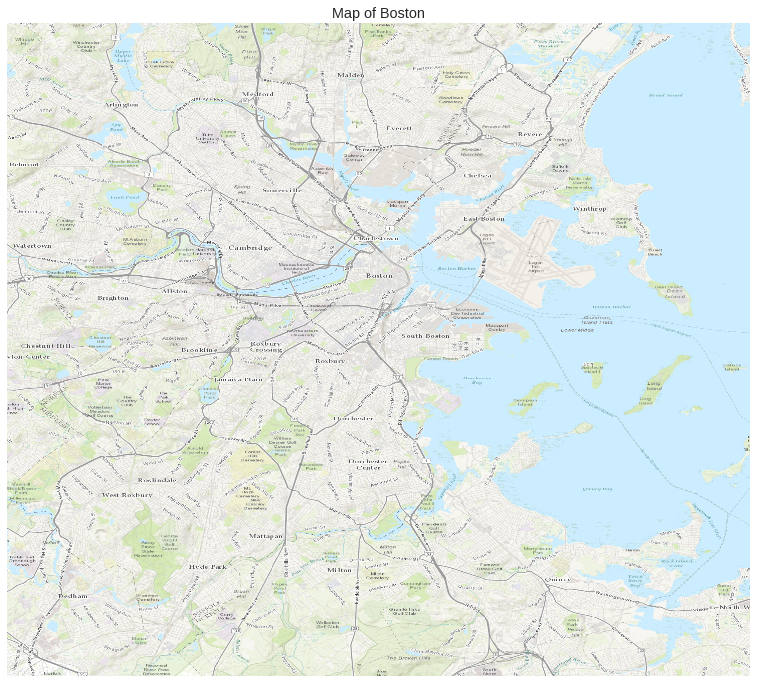

time: 14.3 s


In [42]:
# create map using BASEMAP  42.285643, -71.279984    42.445454, -70.933228
# reference http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html
# http://basemaptutorial.readthedocs.io/en/latest/backgrounds.html
# https://matplotlib.org/basemap/api/basemap_api.html
fig, ax = plt.subplots(figsize=(15, 12))
#using mercator cylindrical projections
m = Basemap(llcrnrlon=-71.19,
            llcrnrlat=42.22,
            urcrnrlon=-70.933228,
            urcrnrlat=42.445454,
            lat_0=42.4,
            lon_0=-70.91,
            projection='merc',
            resolution = 'h',
            area_thresh=10000,
            epsg=4326
            )

# m.drawcoastlines()
# m.drawstates()
# # m.bluemarble()
# m.drawmapboundary(fill_color='aqua')
# m.fillcontinents(color = 'coral', lake_color='aqua')
plt.title('Map of Boston')
m.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/export?bbox=-71.23406399999999,42.186555999999996,-70.970907,42.449543&bboxSR=4326&imageSR=4326&size=1500,1499&dpi=96&format=png32&f=image


/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


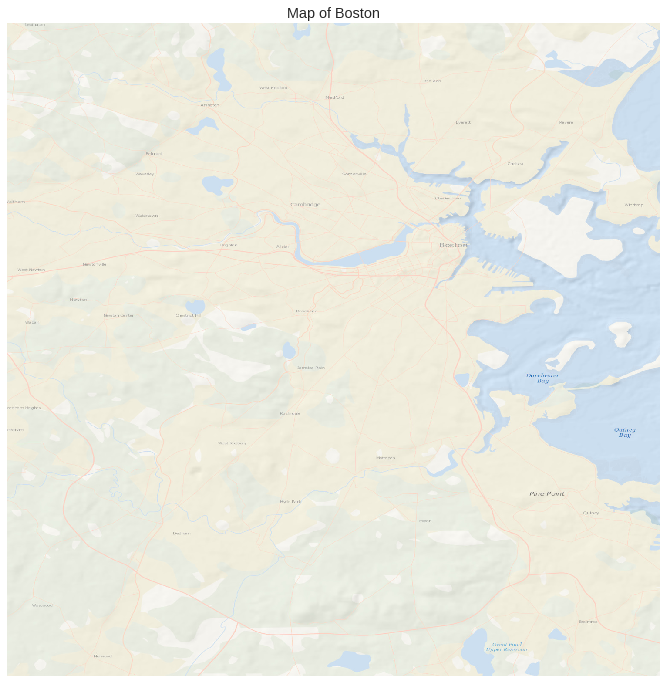

time: 10.9 s


In [64]:
# create map using BASEMAP  42.285643, -71.279984    42.445454, -70.933228
fig, ax = plt.subplots(figsize=(15, 12))
#using mercator cylindrical projections
m = Basemap(llcrnrlon= lonMin-0.1,
            llcrnrlat= latMin-0.1,
            urcrnrlon= lonMax+0.1,
            urcrnrlat= latMax+0.1,
            
#             lat_0=42.361145,
#             lon_0=-71.057083,
            projection='merc',
            ellps = 'WGS84',
            resolution = 'h',
            area_thresh=10000,
            epsg=4326
            )
# m.drawcoastlines()
# m.drawstates()
# m.drawmapboundary(fill_color='aqua')
# m.fillcontinents(color = 'coral', lake_color='aqua')
plt.title('Map of Boston')
m.arcgisimage(service='Ocean_Basemap', xpixels = 1500, verbose= True)
plt.show()

In [47]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

time: 881 ms


In [49]:
# Converting lat lon to points for geopandas
points = [Point(xy) for xy in zip(df.lon, df.lat)]

time: 107 ms


In [50]:
# drop lat lon from pandas dataframe
df = df.drop(['lon', 'lat'], axis=1)

time: 362 ms


In [51]:
#matching Coordinate Reference Systems(CRS) of Map with data
crs = {'init': 'epsg:4326'}

time: 1.6 ms


In [52]:
gdf = GeoDataFrame(df, crs=crs, geometry=points)

time: 54.1 ms


In [53]:
gdf.head()

,name,sic,gh7,geometry
0,BANYAN,NaN,drt2ysx,POINT (-71.0716701046062 42.3440998754528)
1,CAFFE NERO,NaN,drt2twr,POINT (-71.1147459230249 42.3110033651331)
2,MARIO''S SUB & SALADS,NaN,drt2ysx,POINT (-71.0710588104927 42.3450641969571)
3,UNO PIZZERIA & GRILL,NaN,drt2yjk,POINT (-71.09706375926659 42.34859424566029)
4,PANERA BREAD/SAINT LOUIS BREAD CO.,NaN,drt2yh2,POINT (-71.10237295569959 42.34376930291121)


time: 357 ms


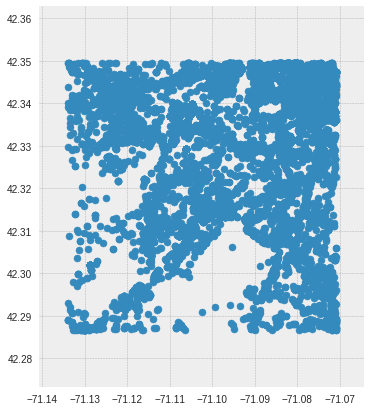

time: 532 ms


In [69]:
gdf.plot(figsize=(20,7))

/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/sameer/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


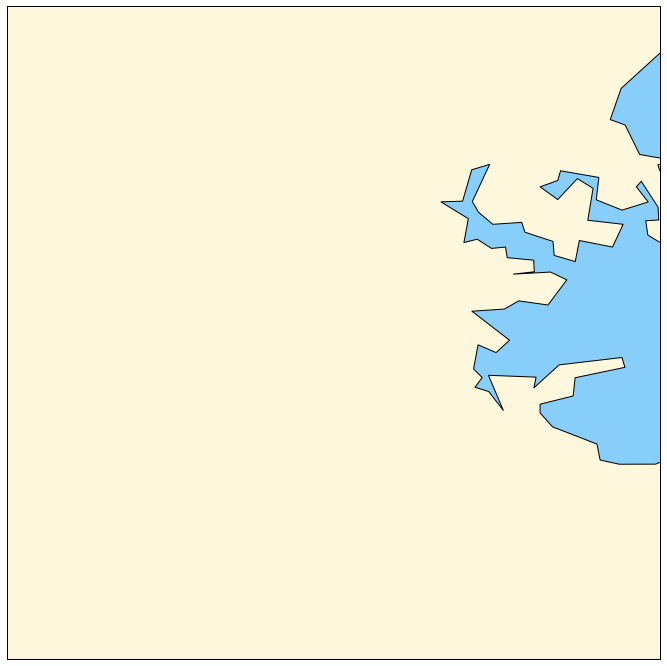

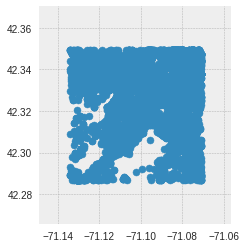

time: 7.88 s


In [70]:
# create map using BASEMAP  42.285643, -71.279984    42.445454, -70.933228
fig, ax = plt.subplots(figsize=(15, 12))
water = 'lightskyblue'
earth = 'cornsilk'
#using mercator cylindrical projections
mm = Basemap(llcrnrlon= lonMin-0.1,
            llcrnrlat= latMin-0.1,
            urcrnrlon= lonMax+0.1,
            urcrnrlat= latMax+0.1,
            
#             lat_0=42.361145,
#             lon_0=-71.057083,
            projection='merc',
            ellps = 'WGS84',
            resolution = 'h',
            area_thresh=10000,
            epsg=4326
            )
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])
gdf.plot()